# 1.MORO OPTIMIZATION

# 1.1 Generate random policies

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.000001) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1000) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Total_Investment_Costs = functools.partial(robustness, SMALLER, 150000000)#THOSE NUMBERS NEED TO BE SPECIFIED AGAINS

A_1_Total_Costs = functools.partial(robustness, SMALLER, 0.000001)
# A_1_Expected_Number_of_Deaths 
# A_2_Total_Costs
# A_2_Expected_Number_of_Deaths 
# A_3_Total_Costs 
# A_3_Expected_Number_of_Deaths 
# A_4_Total_Costs 
# A_4_Expected_Number_of_Deaths 
# A_5_Total_Costs 
# A_5_Expected_Number_of_Deaths 
# RfR_Total_Costs 
# Expected_Evacuation_Costs


In [3]:
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import ema_logging, MultiprocessingEvaluator, SequentialEvaluator
from ema_workbench import (Model, CategoricalParameter, Scenario,
                           ScalarOutcome, IntegerParameter, RealParameter)
from ema_workbench.em_framework.optimization import EpsilonProgress

model, planning_steps = get_model_for_problem_formulation(6)

In [4]:
#enlisting outcomes
for outcome in model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage', variable_name=['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2'], function=<function sum_over at 0x000001E4ADE54E50>)
ScalarOutcome('A.1_Dike Investment Costs', variable_name=['A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'], function=<function sum_over at 0x000001E4ADE54E50>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'], function=<function sum_over at 0x000001E4ADE54E50>)
ScalarOutcome('A.2_Expected Annual Damage', variable_name=['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2'], function=<function sum_over at 0x000001E4ADE54E50>)
ScalarOutcome('A.2_Dike Investment Costs', variable_name=['A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'], function

In [6]:
from ema_workbench import ema_logging, MultiprocessingEvaluator

ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=200,               #500
                                            policies=4,
                                            uncertainty_sampling='mc')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 200 scenarios * 4 policies * 1 model(s) = 800 experiments
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 320 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 480 cases completed
[MainProcess/INFO] 560 cases completed
[MainProcess/INFO] 640 cases completed
[MainProcess/INFO] 720 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [7]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1_Expected Annual Damage', 'A.1_Dike Investment Costs', 'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage', 'A.2_Dike Investment Costs', 'A.2_Expected Number of Deaths', 'A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage', 'A.4_Dike Investment Costs', 'A.4_Expected Number of Deaths', 'A.5_Expected Annual Damage', 'A.5_Dike Investment Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,106.0,214.086145,1.0,0.091249,96.819553,1.0,0.802465,238.490349,1.5,0.626621,...,8.0,10.0,7.0,2.0,6.0,5.0,1.0,2,4,dikesnet
1,102.0,192.925434,10,0.462990,308.347561,10,0.094795,128.275488,1.5,0.611671,...,8.0,10.0,7.0,2.0,6.0,5.0,1.0,3,4,dikesnet
2,19.0,54.953587,1.5,0.284063,237.719212,10,0.693795,37.696954,10,0.203077,...,8.0,10.0,7.0,2.0,6.0,5.0,1.0,4,4,dikesnet
3,60.0,290.124755,1.5,0.890822,62.624468,1.0,0.075965,309.115201,10,0.568770,...,8.0,10.0,7.0,2.0,6.0,5.0,1.0,5,4,dikesnet
4,76.0,206.567832,10,0.556890,45.353281,1.5,0.021115,59.737894,1.0,0.642445,...,8.0,10.0,7.0,2.0,6.0,5.0,1.0,6,4,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,17.0,77.671492,1.0,0.352604,75.262988,1.0,0.472431,196.462302,1.0,0.592483,...,5.0,6.0,0.0,5.0,10.0,10.0,3.0,197,7,dikesnet
796,5.0,105.804357,10,0.686288,123.787864,10,0.377420,35.939967,10,0.356118,...,5.0,6.0,0.0,5.0,10.0,10.0,3.0,198,7,dikesnet
797,98.0,91.668434,10,0.576071,335.897341,1.5,0.069087,51.091245,1.0,0.799854,...,5.0,6.0,0.0,5.0,10.0,10.0,3.0,199,7,dikesnet
798,123.0,198.061746,1.0,0.990190,224.316585,10,0.810989,194.744138,1.5,0.395679,...,5.0,6.0,0.0,5.0,10.0,10.0,3.0,200,7,dikesnet


In [8]:
policies = experiments['policy']

for i, policy in enumerate(np.unique(policies)):
    experiments.loc[experiments['policy']==policy, 'policy'] = str(i)

data = pd.DataFrame(outcomes)
data['policy'] = policies

A_3data = data[['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths',
                'RfR Total Costs', 'Expected Evacuation Costs', "policy"]]

In [10]:
A_3data

,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,0.000000e+00,1.050734e+08,0.000000,1.110800e+09,2091.970113,0
1,0.000000e+00,1.050734e+08,0.000000,1.110800e+09,51.552451,0
2,0.000000e+00,1.050734e+08,0.000000,1.110800e+09,4553.199922,0
3,0.000000e+00,1.050734e+08,0.000000,1.110800e+09,221.492719,0
4,0.000000e+00,1.050734e+08,0.000000,1.110800e+09,613.921964,0
...,...,...,...,...,...,...
795,0.000000e+00,7.808159e+07,0.000000,1.099700e+09,0.000000,3
796,0.000000e+00,7.808159e+07,0.000000,1.099700e+09,0.000000,3
797,0.000000e+00,7.808159e+07,0.000000,1.099700e+09,109.587804,3
798,3.147008e+06,7.808159e+07,0.000844,1.099700e+09,325.198342,3


[MainProcess/INFO] no time dimension found in results


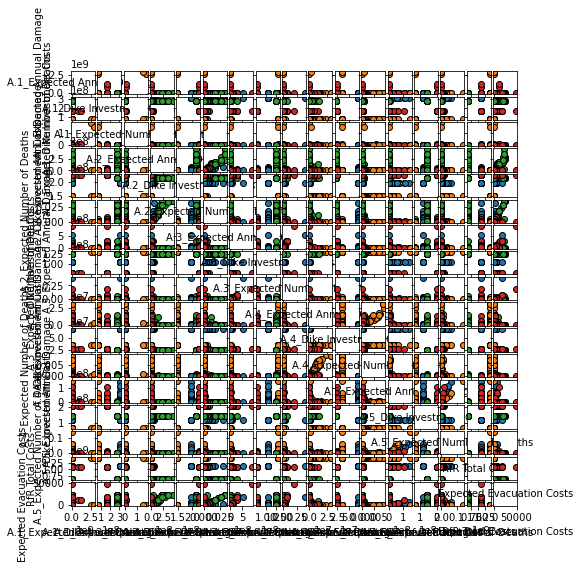

In [21]:
from ema_workbench.analysis import pairs_plotting


%matplotlib inline

fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=False)
fig.set_size_inches(8,8)
plt.show()

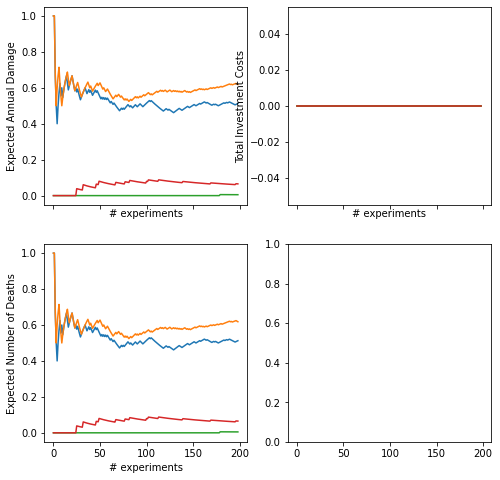

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8),
                        sharex=True)
axes = [axes[0,0],axes[0,1],axes[1,0],axes[1,1]]                             #axes[1,1]

robustness_funcs = {"Expected Number of Deaths": Expected_Number_of_Deaths,
                    "Expected Annual Damage": Expected_Annual_Damage,
                    "Total Investment Costs": Total_Investment_Costs}

experiments, outcomes = results

for ax, (outcome, value) in zip(axes, outcomes.items()):
    for policy in np.unique(experiments['policy']):
        logical = experiments['policy'] == policy
        data = value[logical]
        
        robustness = []
      
        for i in range(1, data.shape[0]):
            robustness.append(robustness_funcs[outcome](data[0:i]))
        ax.plot(robustness, label=policy)
    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)

# 1.2 Search for candidate solutions

the fundamental problem is fine tuning the robustness functions. To do this, rather than run optimizaitons many times, why not first generate a test set with a bunch of policies, apply robustness functions and visualize the results?

This gives us much faster feedback on reasonble cutoff values. 


In [22]:
from ema_workbench.em_framework import sample_uncertainties
n_scenarios = 10
scenarios = sample_uncertainties(model, n_scenarios)
nfe = int(1000)

In [5]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)


In [24]:
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenarios,              
                                            policies=100)

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


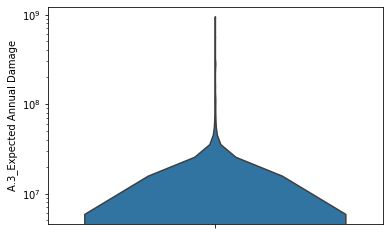

In [27]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='A.3_Expected Annual Damage')
ax.set_yscale('log')
plt.show()

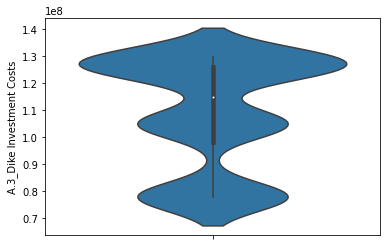

In [29]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='A.3_Dike Investment Costs')
plt.show()

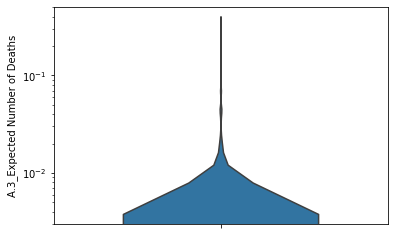

In [32]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='A.3_Expected Number of Deaths')
ax.set_yscale('log')
plt.show()

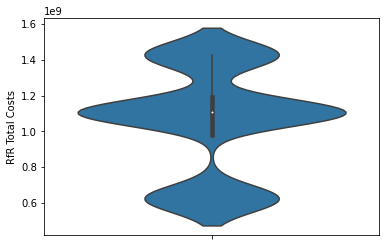

In [34]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='RfR Total Costs')
plt.show()

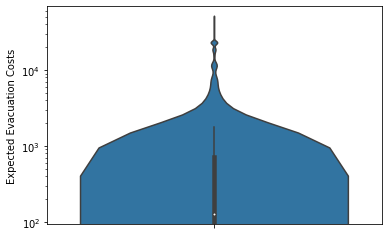

In [36]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Expected Evacuation Costs')
ax.set_yscale('log')
plt.show()

In [77]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

SMALLER = 'SMALLER'

A_3_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.0001) #not ok
A_3_Expected_Annual_Damage = functools.partial(robustness, SMALLER, 10000) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
A_3_Investment_Costs = functools.partial(robustness, SMALLER, 100000)#THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
RfR_Total_costs = functools.partial(robustness, SMALLER, 1000000000)
Evac_costs = functools.partial(robustness, SMALLER, 100000)

In [73]:
test_experiments, test_outcomes = results

In [74]:
A_3_keys = ['A.3_Expected Annual Damage', 'A.3_Dike Investment Costs', 'A.3_Expected Number of Deaths',
                'RfR Total Costs', 'Expected Evacuation Costs']

In [75]:
A_3_dict = { A_3_key: test_outcomes[A_3_key] for A_3_key in A_3_keys }

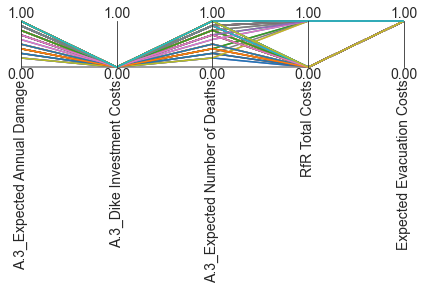

In [78]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {'A.3_Expected Number of Deaths':A_3_Expected_Number_of_Deaths,
         'A.3_Expected Annual Damage': A_3_Expected_Annual_Damage,
         'A.3_Dike Investment Costs': A_3_Investment_Costs,
         'RfR Total Costs': RfR_Total_costs,
         'Expected Evacuation Costs': Evac_costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in A_3_dict.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

# Normal optimization

In [ ]:
import os

file = "results/optimization_test_laszlo"

try:
    # Only run the experiments again if data hasn't been generated yet
    opt_results = pd.read_csv(file)
except IOError:
    with MultiprocessingEvaluator(model) as evaluator:
        opt_results = evaluator.optimize(nfe=1000, epsilons=[0.1, 0.1, 0.1, 0.1, 0.1])
    opt_results.to_csv(file)

In [6]:
reference_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5,
                        'discount rate 0': 3.5, 'discount rate 1': 3.5,
                        'discount rate 2': 3.5,
                        'ID flood wave shape': 4}
scen1 = {}

for key in model.uncertainties:
    name_split = key.name.split('_')

    if len(name_split) == 1:
        scen1.update({key.name: reference_values[key.name]})

    else:
        scen1.update({key.name: reference_values[name_split[1]]})

print(scen1)
ref_scenario = Scenario('reference', **scen1)

convergence_metrics = [EpsilonProgress()]

espilon = [1e3] * len(model.outcomes)

nfe = 2 # proof of principle only, way to low for actual use

with SequentialEvaluator(model) as evaluator:
    results, convergence = evaluator.optimize(nfe=nfe, searchover='levers',
                                                epsilons=espilon,
                                                convergence=convergence_metrics,
                                                reference=ref_scenario)

{'discount rate 0': 3.5, 'discount rate 1': 3.5, 'discount rate 2': 3.5, 'A.0_ID flood wave shape': 4, 'A.1_Bmax': 175, 'A.1_pfail': 0.5, 'A.1_Brate': 1.5, 'A.2_Bmax': 175, 'A.2_pfail': 0.5, 'A.2_Brate': 1.5, 'A.3_Bmax': 175, 'A.3_pfail': 0.5, 'A.3_Brate': 1.5, 'A.4_Bmax': 175, 'A.4_pfail': 0.5, 'A.4_Brate': 1.5, 'A.5_Bmax': 175, 'A.5_pfail': 0.5, 'A.5_Brate': 1.5}


KeyboardInterrupt: 

In [4]:
with SequentialEvaluator(model) as evaluator:
    opt_results = evaluator.optimize(nfe=10, epsilons=[0.1, 0.1, 0.1, 0.1, 0.1])

'ID flood wave shape'
Traceback (most recent call last):
  File "C:\Users\lvreedenburgh\Anaconda3\lib\site-packages\ema_workbench\em_framework\experiment_runner.py", line 85, in run_experiment
    model.run_model(scenario, policy)
  File "C:\Users\lvreedenburgh\Anaconda3\lib\site-packages\ema_workbench\util\ema_logging.py", line 158, in wrapper
    res = func(*args, **kwargs)
  File "C:\Users\lvreedenburgh\Anaconda3\lib\site-packages\ema_workbench\em_framework\model.py", line 338, in run_model
    outputs = self.run_experiment(experiment)
  File "C:\Users\lvreedenburgh\Anaconda3\lib\site-packages\ema_workbench\util\ema_logging.py", line 158, in wrapper
    res = func(*args, **kwargs)
  File "C:\Users\lvreedenburgh\Anaconda3\lib\site-packages\ema_workbench\em_framework\model.py", line 391, in run_experiment
    model_output = self.function(**experiment)
  File "C:\Users\lvreedenburgh\Documents\GitHub\MBDM\final assignment\dike_model_function.py", line 174, in __call__
    waveshape_id =

{'OBJECTID': 0, 'prec_node': nan, 'km': nan, 'branch': nan, 'type': 'upstream', 'dikelevel': nan, 'hground': nan, 'dike_ring': nan, 'traject_id': nan, 'c': nan, 'b': nan, 'lambda': nan, 'traj_ratio': nan, 'Qevents_shape':            0         1         2         3         4         5         6   \
0    0.224895  0.214304  0.224283  0.230353  0.219234  0.203512  0.191063   
1    0.273724  0.264464  0.258063  0.282115  0.334478  0.382453  0.404076   
2    0.142807  0.111245  0.092054  0.084458  0.083052  0.084611  0.089789   
3    0.322389  0.291245  0.265126  0.243159  0.226207  0.221248  0.243066   
4    0.415504  0.401833  0.382493  0.366031  0.353424  0.342985  0.329513   
..        ...       ...       ...       ...       ...       ...       ...   
128  0.278171  0.379085  0.466318  0.510300  0.509764  0.480513  0.447139   
129  0.095764  0.093510  0.091621  0.089864  0.088082  0.086530  0.086463   
130  0.165290  0.176420  0.184651  0.188489  0.187010  0.182686  0.180664   
131  0.1

EMAError: exception in run_model
Caused by: KeyError: 'ID flood wave shape'

ImportError: cannot import name 'G' from 'funs_generate_network' (C:\Users\lvreedenburgh\Documents\GitHub\MBDM\final assignment\funs_generate_network.py)

In [82]:
from ema_workbench import (MultiprocessingEvaluator, ema_logging, 
                           perform_experiments, SequentialEvaluator)
from ema_workbench.em_framework.optimization import (HyperVolume, 
                                                     EpsilonProgress)
from ema_workbench.em_framework.evaluators import BaseEvaluator

BaseEvaluator.reporting_frequency = 0.1

ema_logging.log_to_stderr(ema_logging.INFO)

# there is a bit of problem with platypus, so using 1.1. gives 
# cleaner hypervolume results.
convergence = [HyperVolume(minimum=[0,0,0,0,0], maximum=[1.1, 1.1, 1.1, 1.1, 1.1]),
              EpsilonProgress()]

epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
with MultiprocessingEvaluator(model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios,nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)
    
#start = time.time()
#end = time.time()

#print('Processing time:',(end-start)/60,'Minutes')    

[MainProcess/INFO] pool started
[MainProcess/INFO] terminating pool


AssertionError: 

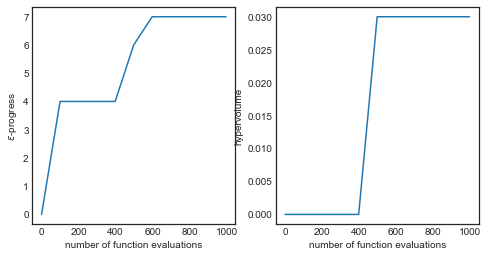

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

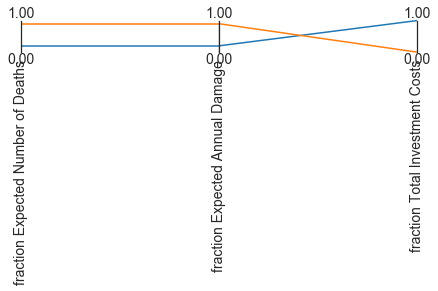

In [62]:
from ema_workbench.analysis import parcoords

data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

This is a bit better but not much. 

Now, observe the following: you are using a domain criterion as your sole measure of robustness. That is, you look at the fraction of scenarios above or below a threshold. The costs however do not vary accross scenarios. Thus this objective can only be 0 or 1. This is not particularly useful for optimization. 

We might thus want to consider another metric for costs. Why not simply use the raw costs itself?


In [63]:
import functools

def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

def costs(data):
    return data[0]/1e9 # makes numbers nicer
    
SMALLER = 'SMALLER'

Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 1e-5) #not ok
Expected_Annual_Damage = functools.partial(robustness, SMALLER, 1e4) #THOSE NUMBERS NEED TO BE SPECIFIED AGAINS
Total_Investment_Costs = costs


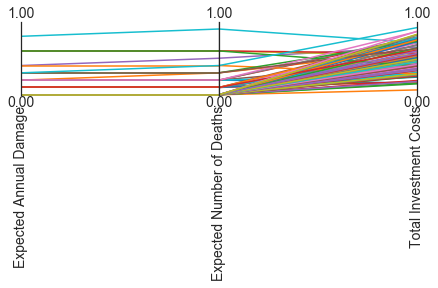

In [64]:
from ema_workbench.analysis import parcoords

experiments, outcomes = results

funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
         'Expected Annual Damage': Expected_Annual_Damage,
         'Total Investment Costs': Total_Investment_Costs}

total_scores = {}
for policy in np.unique(experiments['policy']):
    scores = {}
    logical = experiments['policy'] == policy
    
    temp_outcomes = {k:v[logical] for k,v in outcomes.items()}
    
    for k, v in temp_outcomes.items():
        score = funcs[k](v)
        scores[k] = score
    total_scores[policy] = scores

data = pd.DataFrame(total_scores).T.reset_index(drop=True)
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

This already looks much nicer.

In [67]:
MAXIMIZE = ScalarOutcome.MAXIMIZE
MINIMIZE = ScalarOutcome.MINIMIZE

funcs = {'Expected Number of Deaths':Expected_Number_of_Deaths,
         'Expected Annual Damage': Expected_Annual_Damage,
         'Total Investment Costs': Total_Investment_Costs}

robustnes_functions = [ScalarOutcome('fraction EA deaths', kind=MAXIMIZE, 
                             variable_name='Expected Number of Deaths', function=Expected_Number_of_Deaths),
                       ScalarOutcome('fraction EA damage', kind=MAXIMIZE, 
                             variable_name='Expected Annual Damage', function=Expected_Annual_Damage),
                       ScalarOutcome('investment costs', kind=MINIMIZE, # note that we have to minimize costs!
                             variable_name='Total Investment Costs', function=Total_Investment_Costs)]

In [68]:
# we have to change the plausible max for total investment costs
convergence = [HyperVolume(minimum=[0,0,0], maximum=[1.1, 1.1, 3]),
              EpsilonProgress()]

epsilons=[0.05,]*len(robustnes_functions)  #final value of epsilon should be much lower.Just for experiment purposes is 1
with MultiprocessingEvaluator(model) as evaluator:
    archive, convergence = evaluator.robust_optimize(robustnes_functions, scenarios, nfe=nfe,
                                                     convergence=convergence, epsilons=epsilons)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 1: 100/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 2: 200/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 3: 300/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 4: 400/1000 nfe
[MainProcess/INFO] performing 10 scenarios * 100 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 5: 500/1000 nfe
[MainProcess/INFO] performing 10 scenarios *

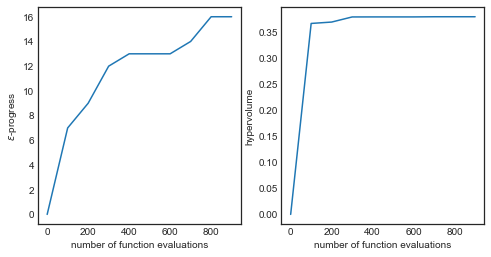

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

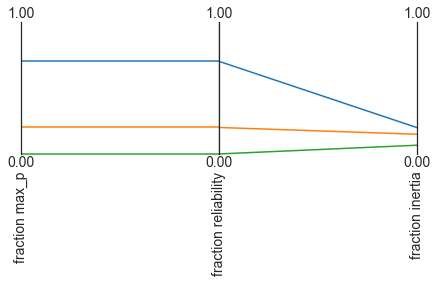

In [70]:
data = archive.loc[:, [o.name for o in robustnes_functions]]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

# 1.3 Re-evaluate candidate solutions under uncertainty

In [30]:
from ema_workbench import Policy

policies = archive.drop([o.name for o in robustnes_functions], axis=1)
policies_to_evaluate = []

for i, policy in policies.iterrows():
    policies_to_evaluate.append(Policy("moro {}".format(i), **policy.to_dict()))

In [31]:
n_scenarios = 1000
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies_to_evaluate)

#start = time.time()
#end = time.time()

#print('Processing time:',(end-start)/60,'Minutes')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [32]:
from ema_workbench import save_results

save_results(results, 'MORO_reevaluation.tar.gz')

[MainProcess/INFO] results saved successfully to C:\Users\anton\Desktop\EPAMasterprogram\4thquarter\Model-based Decision-Making\Assignments-11-06-2018\epa1361_open-master\final assignment\MORO_reevaluation.tar.gz


In [33]:
policies.to_csv('moro polices.csv')

In [34]:
import pandas as pd
experiments, outcomes = results

overall_robustness = {}
for policy in np.unique(experiments['policy']):
    policy_robustness = {}

    logical = experiments['policy'] == policy
    
    for outcome, values in outcomes.items():
        values = values[logical]
        policy_robustness[outcome] = robustness_funcs[outcome](values)
    overall_robustness[policy] = policy_robustness
overall_robustness = pd.DataFrame.from_dict(overall_robustness).T
overall_robustness

,Expected Annual Damage,Expected Number of Deaths,Total Investment Costs
moro 0,0.96,0.96,0.0


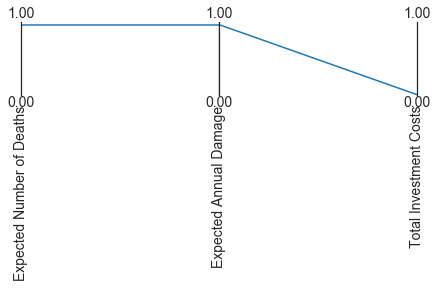

In [35]:

data = overall_robustness.loc[:, 
                              ['Expected Number of Deaths', 'Expected Annual Damage', 'Total Investment Costs']]
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()